<a href="https://colab.research.google.com/github/BehrangHaghdoust/deeplearning-tensorflow2-notebooks/blob/master/02-Cross-entropy-sparse-from_logits-flatten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


## Load a dataset

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
import matplotlib.pyplot as plt

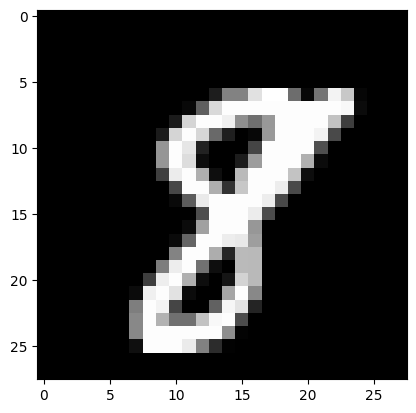

In [8]:
plt.imshow(x_train[55], cmap='gray')

In [9]:
model = tf.keras.models.Sequential([
   tf.keras.Input(shape=(28,28)) ,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8550 - loss: 0.4941
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9545 - loss: 0.1528
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9661 - loss: 0.1086
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9727 - loss: 0.0883
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9759 - loss: 0.0761


In [12]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9765 - loss: 0.0758


[0.07579082995653152, 0.9764999747276306]

In [13]:
y_test[12]

9

In [14]:
x_test[10].shape

(28, 28)

In [15]:
test_sample = x_test[12].reshape(1,28,28)

In [16]:
model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([[-10.961037  , -10.274534  ,  -9.489856  ,   0.05001534,
          0.7099202 ,  -5.5122066 , -15.870633  ,  -0.42299685,
         -6.0598392 ,  10.0012865 ]], dtype=float32)

In [17]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [18]:
probability_model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


array([[7.8723672e-10, 1.5640431e-09, 3.4279199e-09, 4.7658908e-05,
        9.2201291e-05, 1.8302146e-07, 5.8062305e-12, 2.9697345e-05,
        1.0584431e-07, 9.9983013e-01]], dtype=float32)